In [1]:
import os
os.chdir(r"C:\Users\user\IET\UM\agh-um-gaussian-mixture-models")

In [56]:
from sklearn.datasets import fetch_20newsgroups, fetch_20newsgroups_vectorized
from pprint import pprint
from sklearn.feature_extraction.text import TfidfVectorizer
from src.gaussian_mixture.gaussian_mixture import evaluate_case, find_best_component_number
from src.utils.dataset import visualize
from src.utils.dataset import *
import pandas as pd
from sklearn.mixture import BayesianGaussianMixture, GaussianMixture
from sklearn.cluster import KMeans
from sys import getsizeof
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE, MDS
import matplotlib.pyplot as plt

In [5]:
newsgroups = fetch_20newsgroups(subset='all', shuffle=True, download_if_missing=False)

In [8]:
newsgroups.target

array([10,  3, 17, ...,  3,  1,  7])

In [4]:
pprint(list(newsgroups.target_names))

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']


In [9]:
texts = newsgroups.data # Extract text
target = newsgroups.target # Extract target

In [10]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(texts)
X = X.astype(np.float32)

In [11]:
from sklearn.manifold import TSNE
dim2 = TSNE(n_components=2).fit_transform(X)

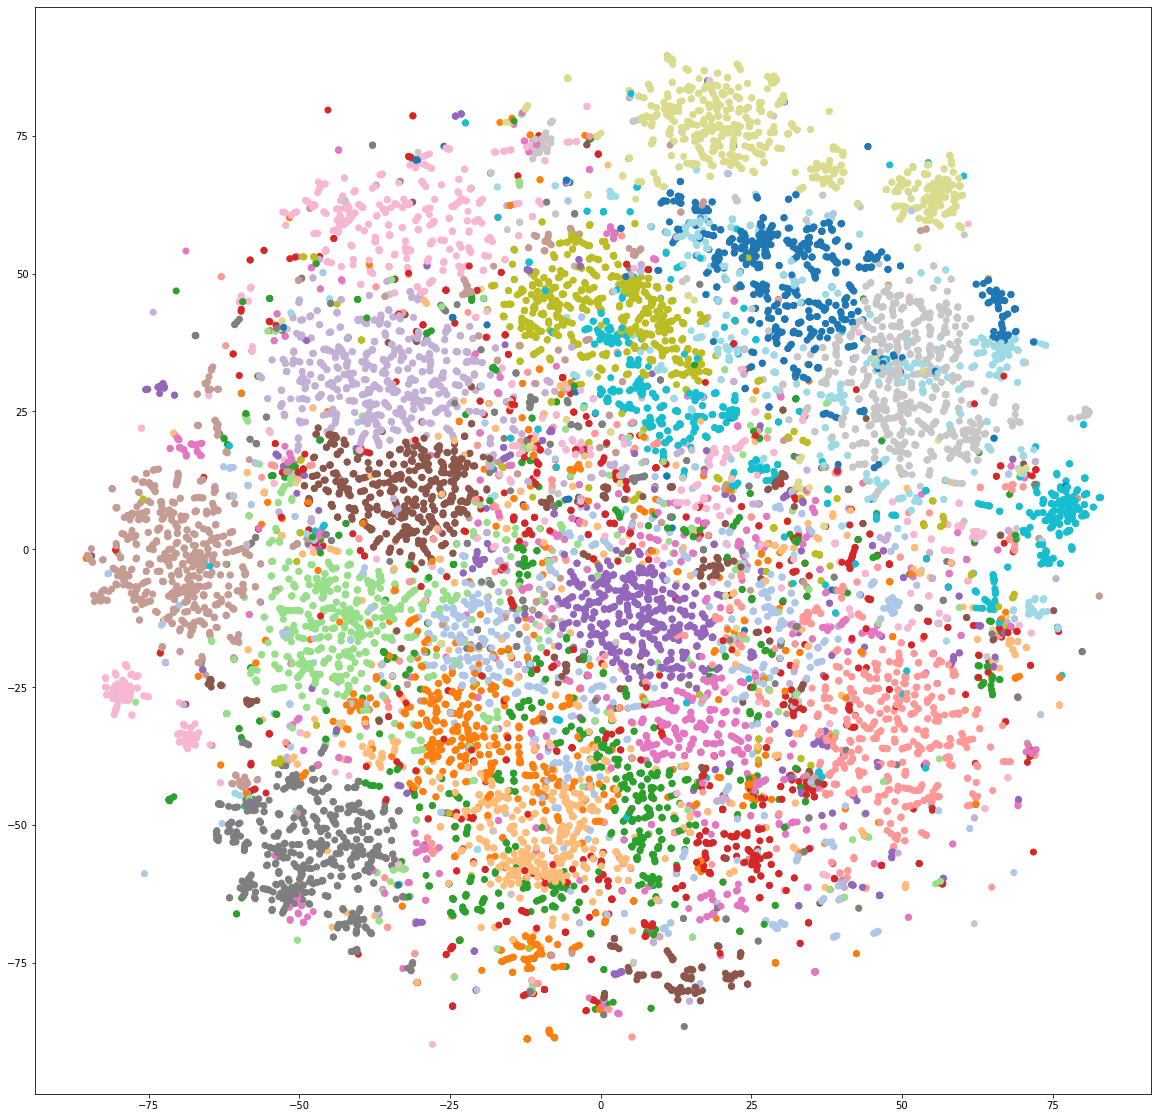

In [21]:
plt.figure(figsize=(20,20))
plt.scatter(dim2[:,0], dim2[:,1], c=target, cmap='tab20')

In [22]:
from sklearn.decomposition import LatentDirichletAllocation

In [29]:
lda = LatentDirichletAllocation(n_components=20, learning_method='online', n_jobs=8)

In [30]:
x_lda = lda.fit_transform(X)

In [ ]:
ng_lda = TSNE(n_components=2).fit_transform(x_lda)

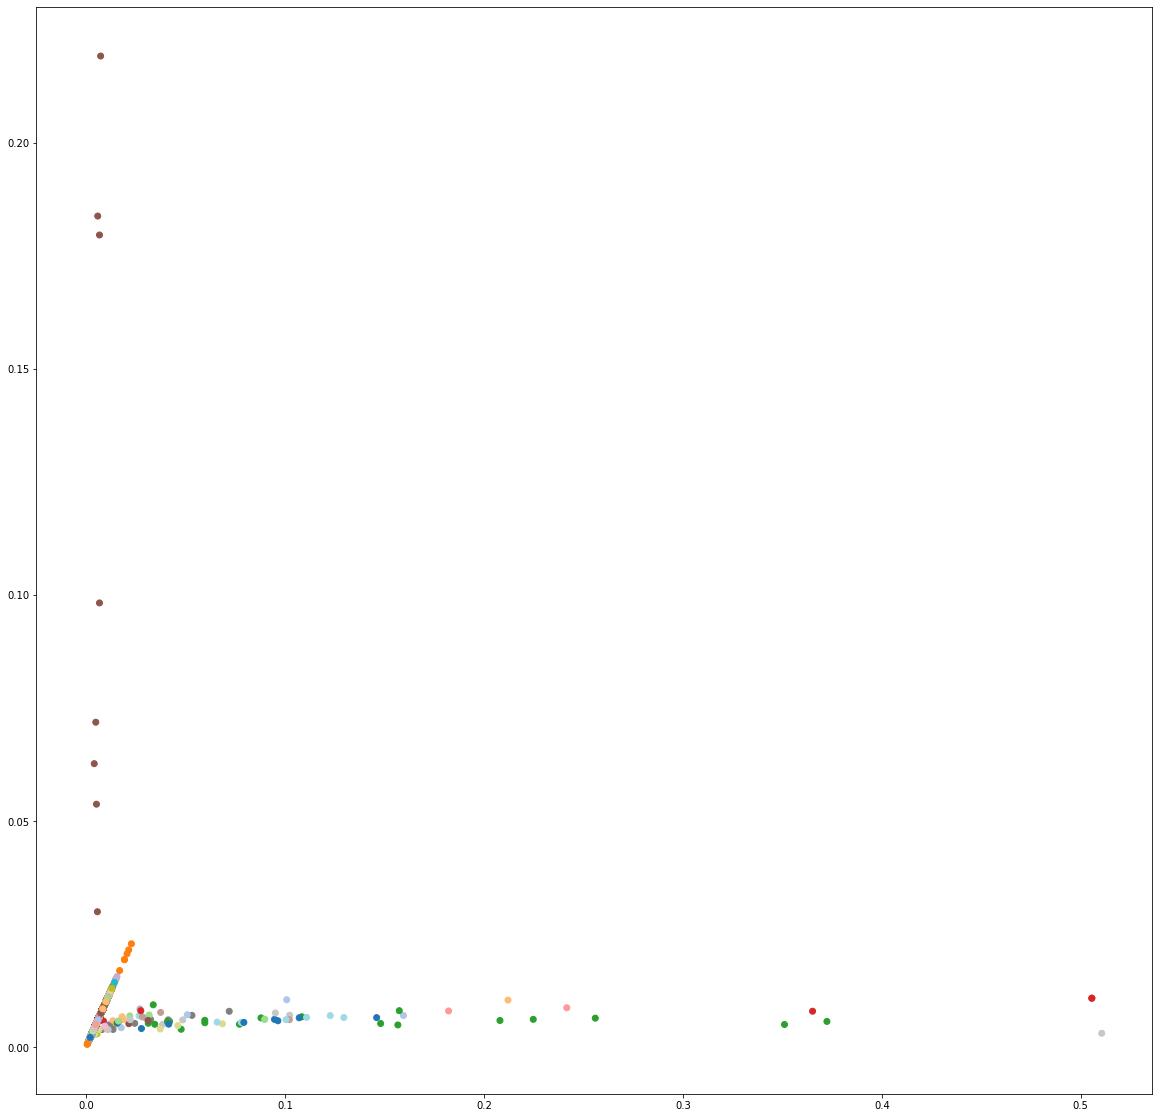

In [31]:
plt.figure(figsize=(20,20))
plt.scatter(ng_lda[:,0], ng_lda[:,1], c=target, cmap='tab20')

In [34]:
import pickle
with open("ng_lda_20", "wb") as file:
    pickle.dump(x_lda, file)

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.datasets import fetch_20newsgroups
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data

no_features = 1000

tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tf = tf_vectorizer.fit_transform(documents)
tf_feature_names = tf_vectorizer.get_feature_names()

In [41]:
no_topics = 20

# Run LDA
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0, n_jobs=4).fit(tf)

In [42]:
x_lda = lda.transform(tf)

In [43]:
tsne_lda = TSNE(n_components=2).fit_transform(x_lda)

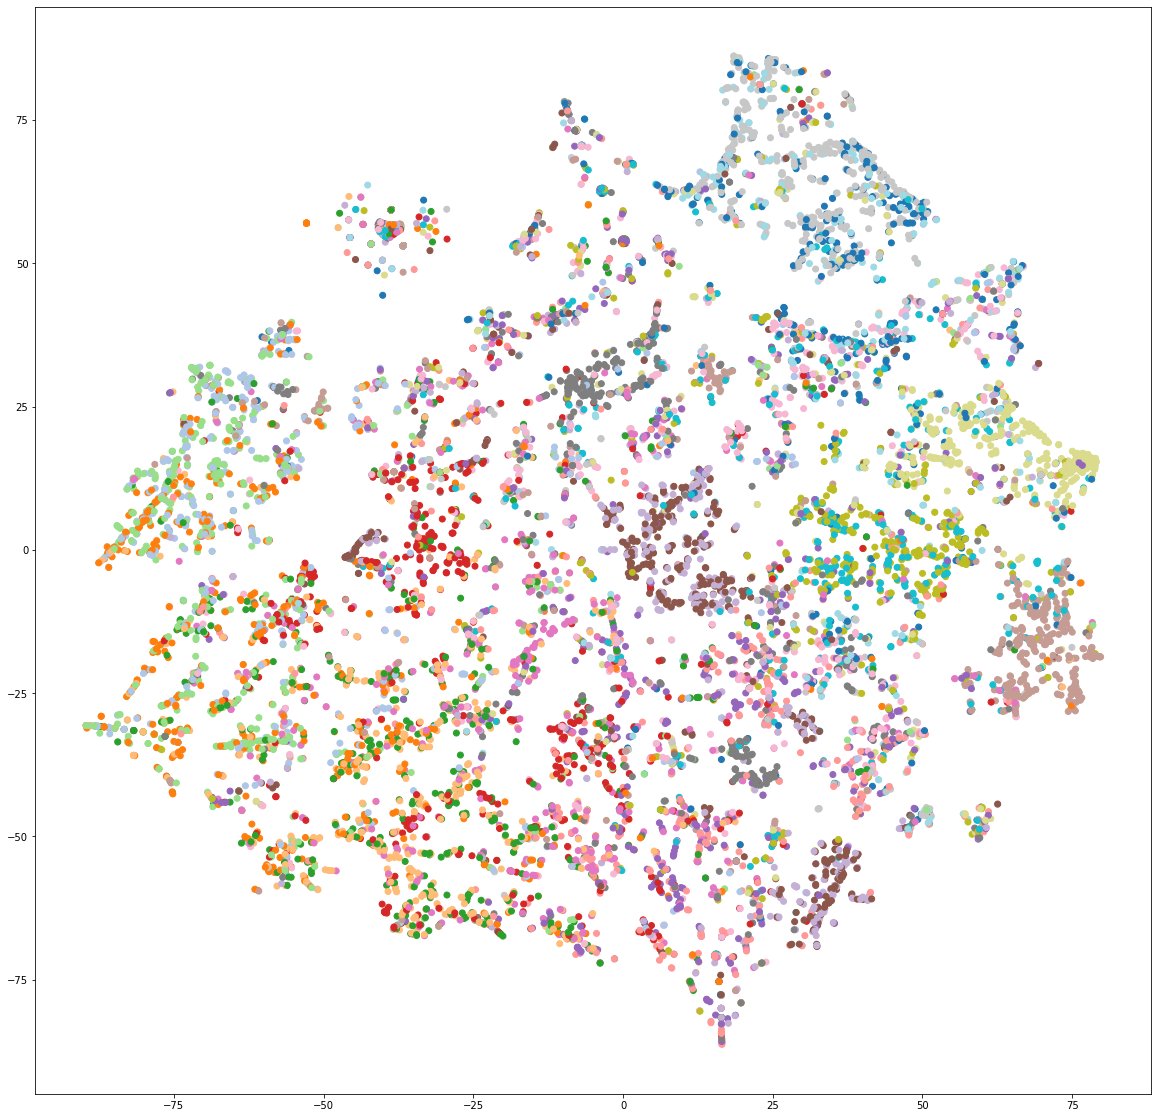

In [46]:
plt.figure(figsize=(20,20))
plt.scatter(tsne_lda[:,0], tsne_lda[:,1], c=dataset.target, cmap='tab20')

In [54]:
# df = pd.DataFrame(x_lda)
# df.name = 'lda_20ng'
gmm = BayesianGaussianMixture(n_components=20)
gmm.fit(x_lda)

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


BayesianGaussianMixture(n_components=20)

In [58]:
predicted = gmm.predict(x_lda)

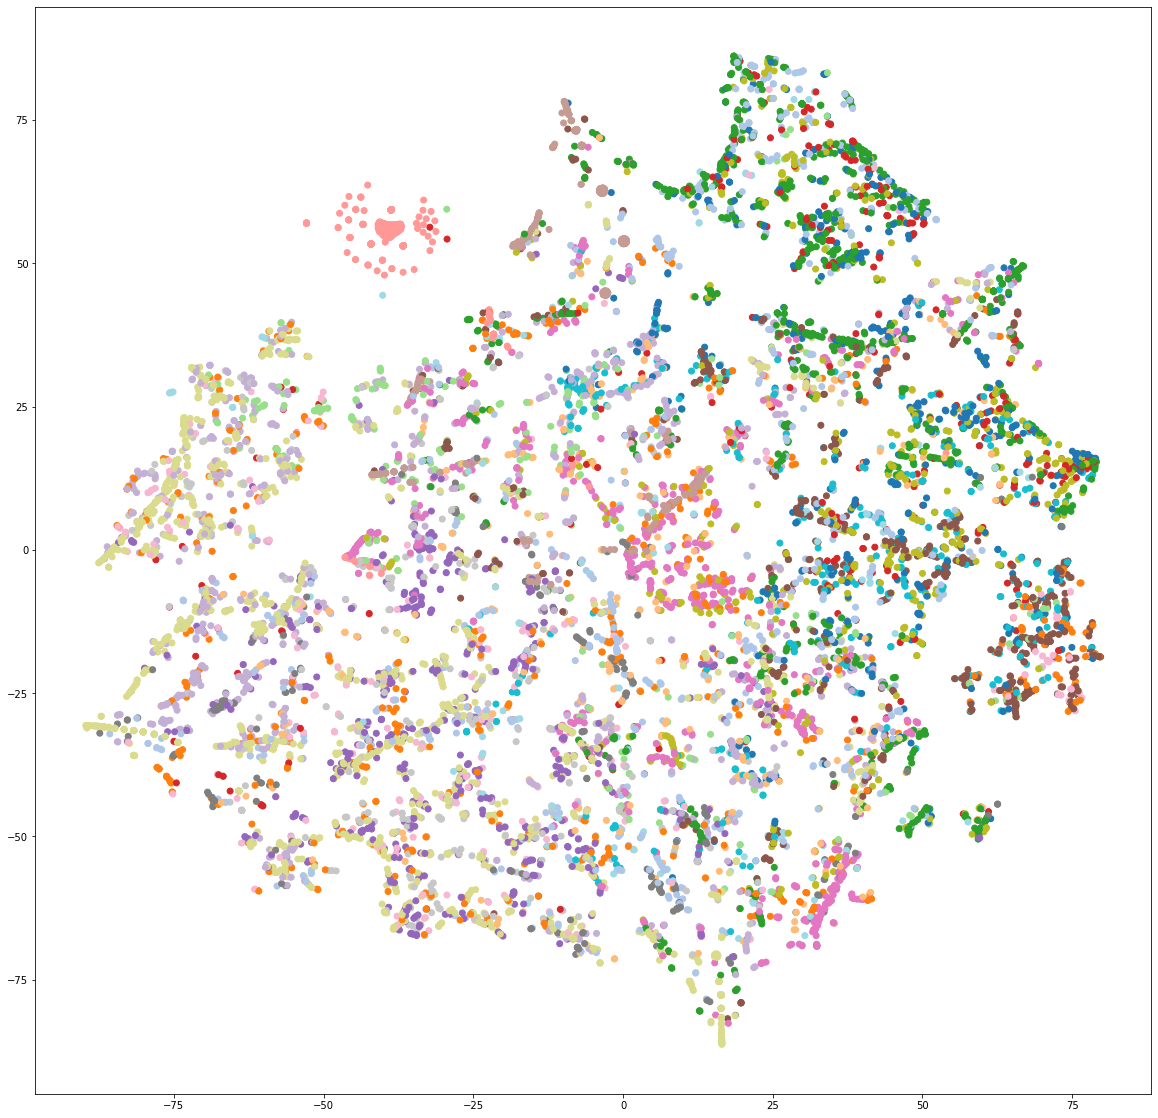

In [59]:
plt.figure(figsize=(20,20))
plt.scatter(tsne_lda[:,0], tsne_lda[:,1], c=predicted, cmap='tab20')

In [67]:
print('Accuracy:')
((predicted == dataset.target).sum() / len(predicted)) * 100

Accuracy:


3.5266042071769492

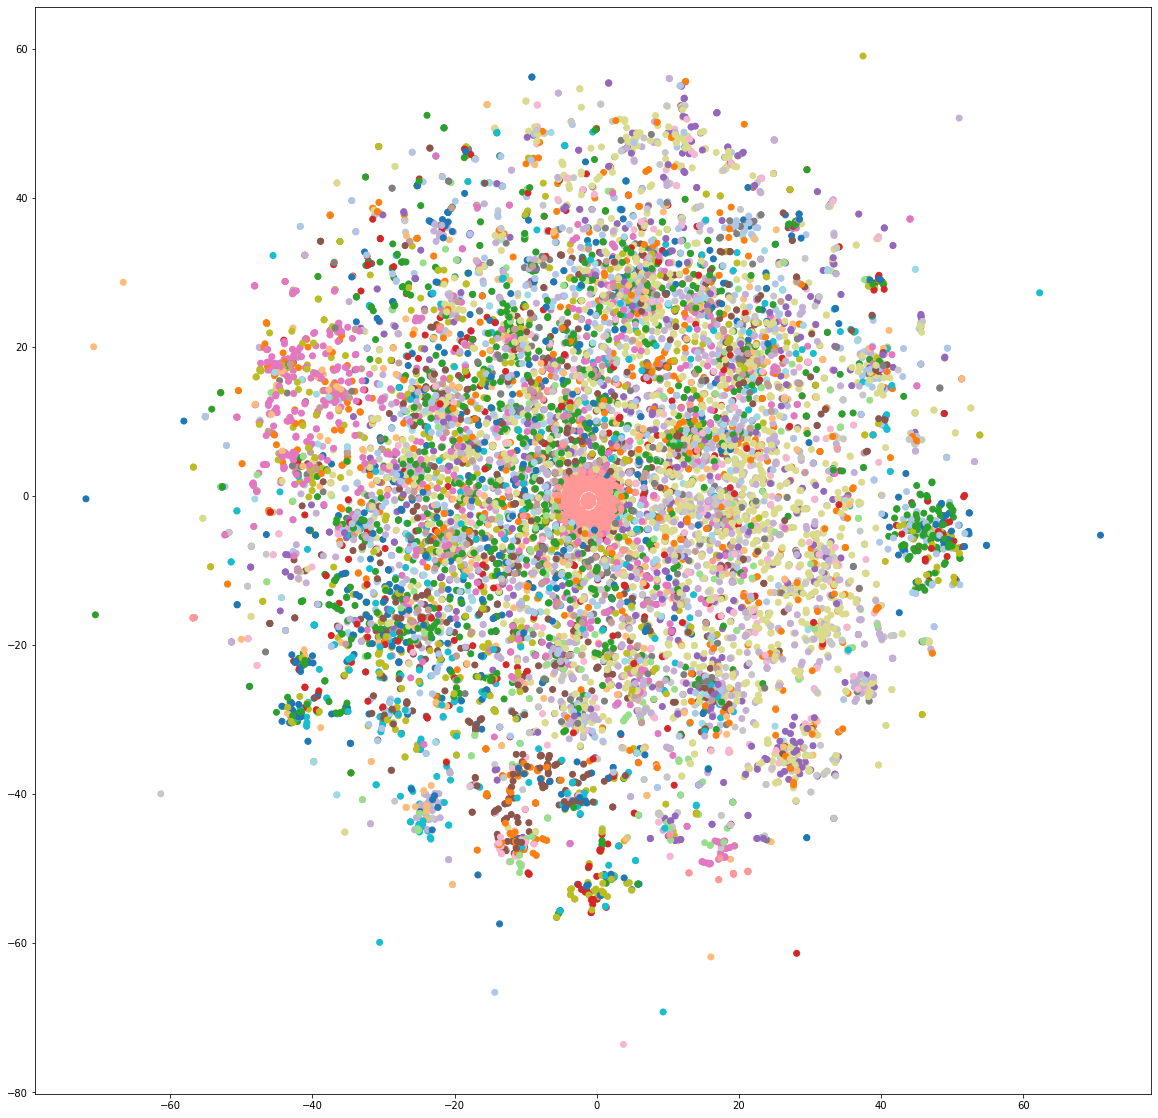

In [66]:
dim2 = TSNE(n_components=2).fit_transform(tf)
plt.figure(figsize=(20,20))
plt.scatter(dim2[:,0], dim2[:,1], c=predicted, cmap='tab20')